In [1]:
import pandas as pd
from matplotlib import pyplot as plt

def compareStats(fname, total=16000):
    file = open(fname, 'r')
    swid = 12;
    queuestats = {}
    probestats = {}
    for line in file:
        if line.startswith('QUEUE'):
            line = line.strip().split(' ')
            deviceid = int(line[1].split('/')[4])
            if deviceid not in queuestats:
                queuestats[deviceid] = []
            qocc = int(line[-1])
            queuestats[deviceid].append(qocc)
        elif line.startswith('PROBE'):
            l = line.strip().split(' ')
            switchid = int(l[1])
            portid = int(l[2])
            maxq = int(l[3])
            if portid not in probestats:
                probestats[portid] = []
            
            probestats[portid].append(maxq)
    
    data = probestats
    indexlen = 9999999999
    for key in data:
        indexlen = min(indexlen, len(data[key]))
        
    indexlen = 3000
    
    for key in data:
        data[key] = data[key][:indexlen]
        
    index = [i for i in range(indexlen)]
    plt.rcParams["figure.figsize"] = [10, 6]
    df = pd.DataFrame(data, index=index)
    df.plot.line()
    plt.title("Maximum queue occupancy trend of ports in switch {}".format(switchid))
    plt.ylabel("Maximum queue occupancy")
    plt.xlabel("nth probe")
    
    # now lets plot another from queuestats
    
    pindexlen = 0
    for key in queuestats:
        pindexlen = max(pindexlen, len(queuestats[key]))
    
    pindexlen = total
    for key in queuestats:
        if len(queuestats[key]) < pindexlen:
            queuestats[key] = queuestats[key][:pindexlen] + [0]*(pindexlen-len(queuestats[key]))
        else:
            queuestats[key] = queuestats[key][:pindexlen]
    pindex = [i for i in range(pindexlen)]
    plt.rcParams["figure.figsize"] = [10, 6]
    pdf = pd.DataFrame(queuestats, index=pindex)
    pdf.plot.line()
    plt.title("Queue occupancy changes in switch {} over time".format(switchid))
    plt.ylabel("Queue occupancy")
    plt.xlabel("Time instance(not according to scale)")
            

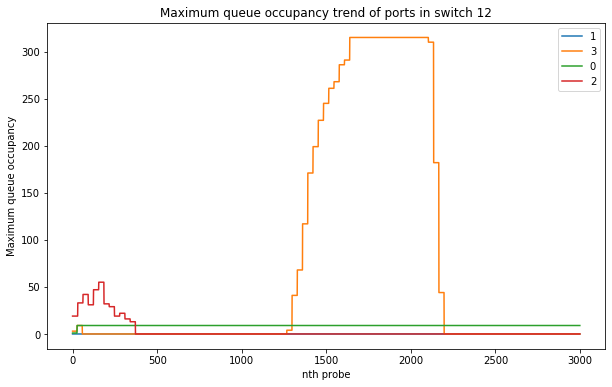

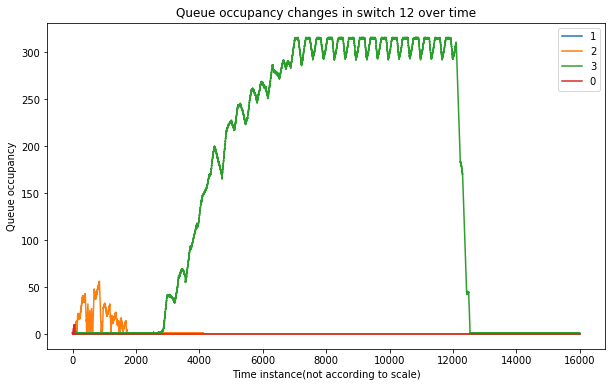

In [96]:

compareStats('t0001-s12-1000p-q.log') # queue size = 1000 packets

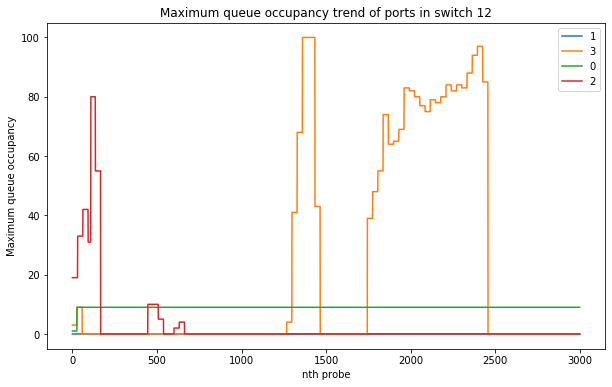

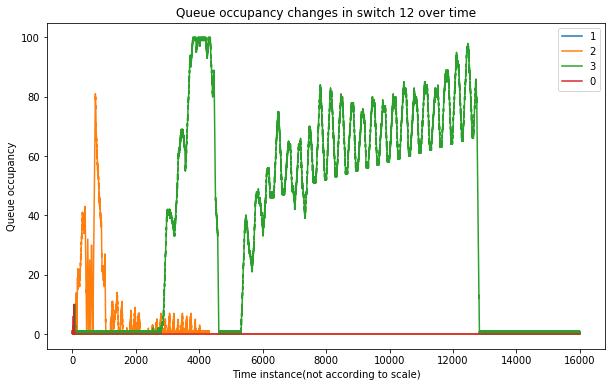

In [97]:
compareStats('t0001-s12-100p-q.log') # queue size = 100 packets

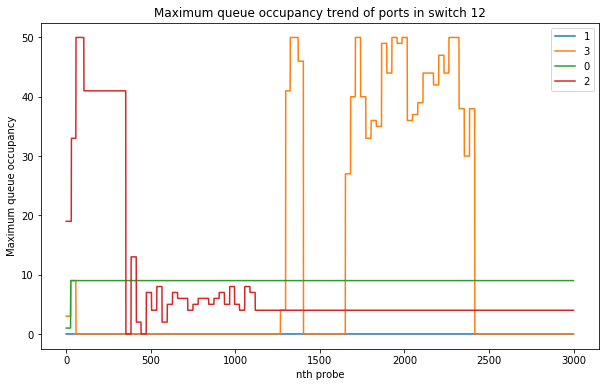

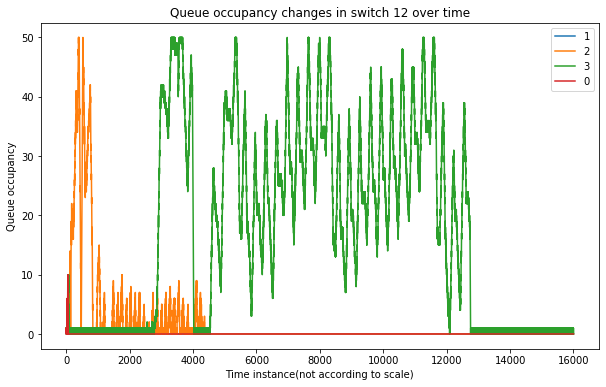

In [98]:
compareStats('t0001-s12-50p-q.log') # queue size = 50 packets

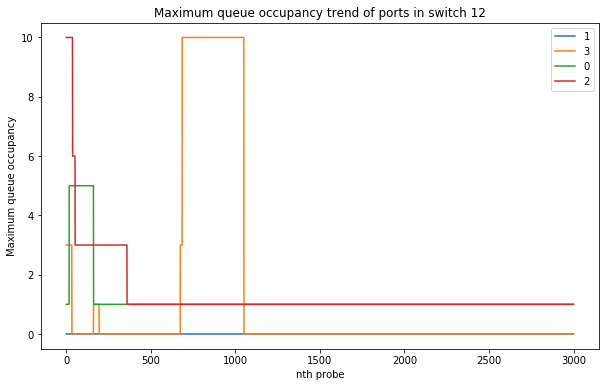

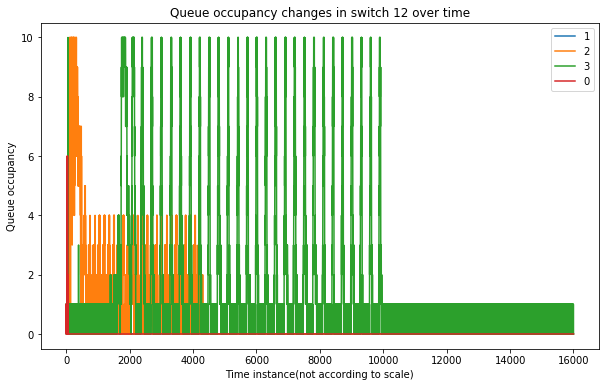

In [99]:
compareStats('t0001-s12-10p-q.log') # queue size = 10 packets

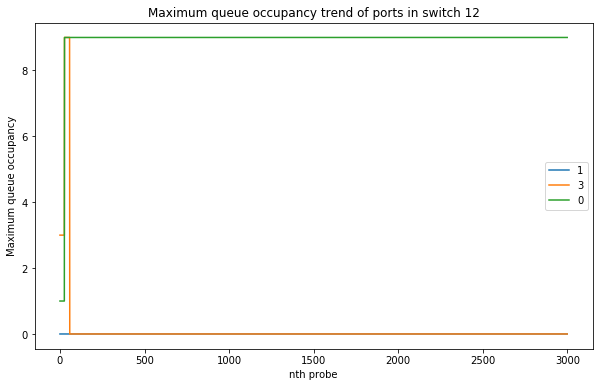

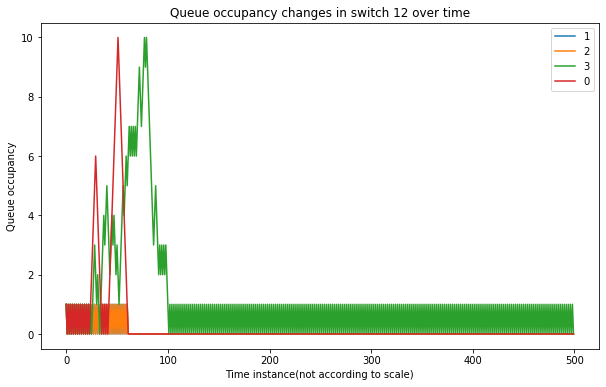

In [4]:
compareStats('t0001-s12-100p-q-notransfer.log', 500) # queue size = 100 packets


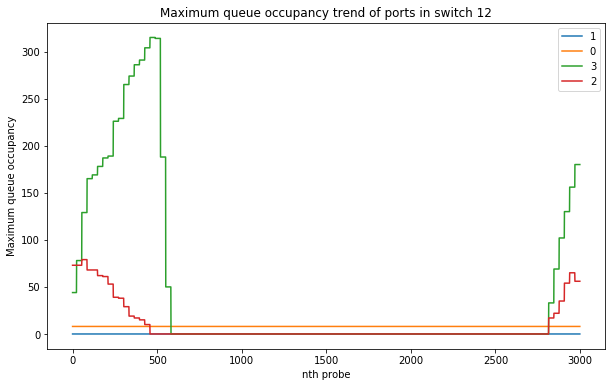

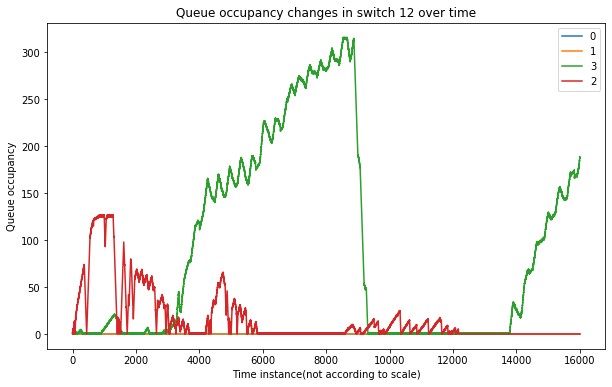

In [5]:
compareStats('final.log')

In [52]:
import pandas as pd
from matplotlib import pyplot as plt

def timedStatsQ(fname, total=2000):
    file = open(fname, 'r')
    swid = 12;
    queuestats = {}
    probestats = {}
    for line in file:
        if line.startswith('QUEUE'):
            line = line.strip().split(' ')
            time = int(line[1])
            deviceid = int(line[2].split('/')[4])
            if deviceid not in queuestats:
                queuestats[deviceid] = {'time':[], 'q': []}
            qocc = int(line[-1])
            queuestats[deviceid]['time'].append(time)
            queuestats[deviceid]['q'].append(qocc)
            
    data = {}
    target = queuestats[3]
    
    for i in range(len(target['time'])):
        tym = target['time'][i]
        if tym not in data:
            data[tym] = target['q'][i]
        data[tym] = max(data[tym], target['q'][i])
    
    
    plotd = {'3': []}
    tym = []
    
    for t in data:
        tym.append(t)
        plotd['3'].append(data[t])
    
    total = 31000
    tym = tym[:total]
    plotd['3'] = plotd['3'][:total]
    
    plt.rcParams["figure.figsize"] = [10, 6]
    pdf = pd.DataFrame(plotd, index=tym)
    pdf.plot.line()
    plt.title("Queue occupancy changes in switch {} over time".format(12))
    plt.ylabel("Queue occupancy")
    plt.xlabel("Time instance(not according to scale)")
    
    

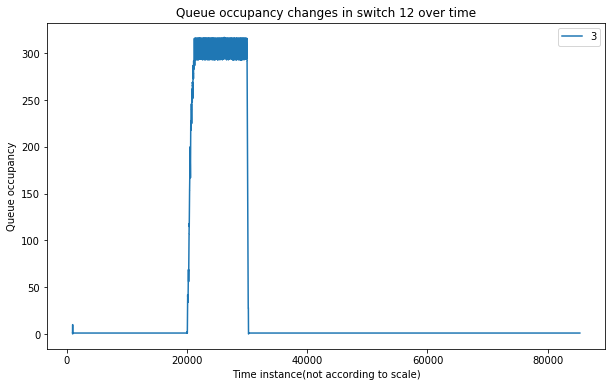

In [53]:
timedStatsQ('qwt.log')

In [17]:
max(5,4)

5

Text(0.5, 0, 'Number of offloading targets selected')

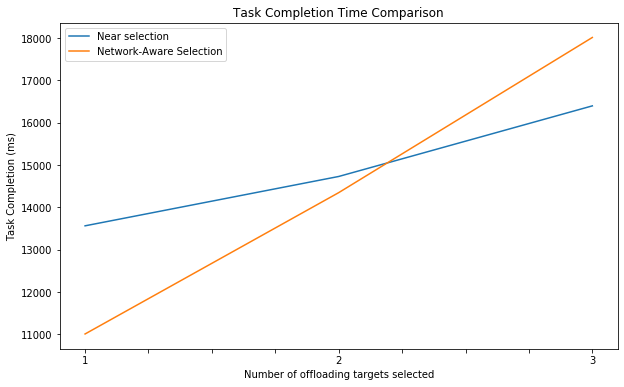

In [59]:
import pandas as pd
from matplotlib import pyplot as plt

graph = {
    'Near selection': [13564, 14730, 16398],
    'Network-Aware Selection': [11009, 14348, 18014]
}

index = ['1','2','3']
plt.rcParams["figure.figsize"] = [10, 6]
# plt.xticks()
pdf = pd.DataFrame(graph, index=index)
pdf.plot.line()
plt.title("Task Completion Time Comparison".format(12))
plt.ylabel("Task Completion (ms)")
plt.xlabel("Number of offloading targets selected")

# task being offloaded from node "0"

# bacground data transfers
# 0->1, 2->3, 4->5
# {"tym_s":"21.1706", "context":"debug", "node":"0", "4":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "5":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "6":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "7":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "8":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "9":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "10":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "11":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "12":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "13":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "14":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "15":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "16":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "17":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "18":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "19":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "20":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "21":"14"}
# {"tym_s":"21.1706", "context":"debug", "node"
:"0", "22":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "23":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "24":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "25":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "26":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "27":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "28":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "29":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "30":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "31":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "32":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "33":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "34":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "35":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "36":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "37":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "38":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "39":"14"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "3":"15"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "2":"135"}
# {"tym_s":"21.1706", "context":"debug", "node":"0", "1":"315"}



Text(0.5, 0, 'Number of offloading targets selected')

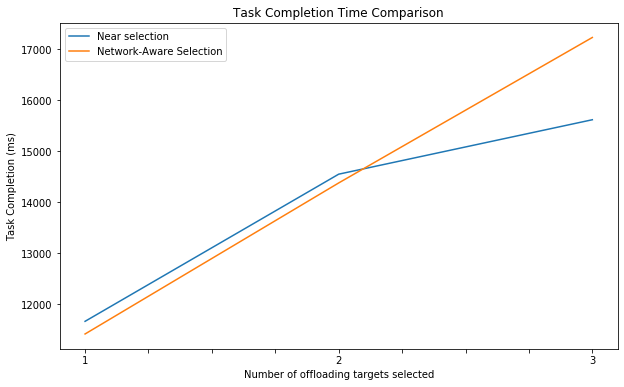

In [61]:
import pandas as pd
from matplotlib import pyplot as plt

graph = {
    'Near selection': [11661, 14546, 15613],
    'Network-Aware Selection': [11413, 14374, 17226]
}

index = ['1','2','3']
plt.rcParams["figure.figsize"] = [10, 6]
# plt.xticks()
pdf = pd.DataFrame(graph, index=index)
pdf.plot.line()
plt.title("Task Completion Time Comparison".format(12))
plt.ylabel("Task Completion (ms)")
plt.xlabel("Number of offloading targets selected")

# task being offloaded from node "39"

# bacground data transfers
# 39->38, 37->36, 35->34

# {"tym_s":"21.5058", "context":"debug", "node":"39", "4":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "5":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "6":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "7":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "8":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "9":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "10":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "11":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "12":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "13":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "14":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "15":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "16":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "17":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "18":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "19":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "20":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "21":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "22":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "23":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "24":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "25":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "26":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "27":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "28":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "29":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "30":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "31":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "32":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "33":"0"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "36":"6"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "34":"14"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "2":"24"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "3":"24"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "35":"24"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "38":"24"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "0":"25"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "1":"25"}
# {"tym_s":"21.5058", "context":"debug", "node":"39", "37":"127"}


In [62]:
# {"tym_s":"21.1636", "context":"metric", "node":"0", "offload-session-id":"0", "QUERY_RESPONSE_RCVD_MS":"21163"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "4":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "5":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "6":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "7":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "8":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "9":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "10":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "11":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "12":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "13":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "14":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "15":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "16":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "17":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "18":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "19":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "20":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "21":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "22":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "23":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "24":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "25":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "26":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "27":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "28":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "29":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "30":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "31":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "32":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "33":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "34":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "35":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "36":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "37":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "38":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "39":"7"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "3":"12"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "2":"132"}
# {"tym_s":"21.1636", "context":"debug", "node":"0", "1":"315"}